# Notebook to generate subplots of Figure 12
Caption: Total number of JITAIs sent to each participant for all participants in Phase 1 and Phase 2.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# Set the font to be used for text rendering
# rc('font', family='serif')
# rc('text', usetex=True)

In [3]:
#df = pd.read_csv('data.csv')

In [4]:
#df = pd.read_parquet("../../1_data/1_usk_jitai_data_raw_2023-08-04_120400.parquet.gzip")
#df["id_message"].unique()

# Read data

In [5]:
# Original data
#df_phase1 = pd.read_parquet("../../1_data/1_orenth_jitai_data_raw_2023-08-04_120400.parquet.gzip")
#df_phase2 = pd.read_parquet("../../1_data/1_usk_jitai_data_raw_2023-08-04_120400.parquet.gzip")

#df_phase1["timestamp_lambda"] = pd.to_datetime(df_phase1["timestamp_lambda"])
#df_phase2["timestamp_lambda"] = pd.to_datetime(df_phase2["timestamp_lambda"])



# Public data
df_phase1 = pd.read_csv("../1_data/3_jitai_data_participants_phase1_orenth.csv")
df_phase2 = pd.read_csv("../1_data/4_jitai_data_participants_phase2_usk.csv")

In [6]:
df_phase1["id_message"].unique()

array(['jitai_temperature', 'jitai_noise'], dtype=object)

In [7]:
df_phase2["id_message"].unique()

array(['jitai_temperature', 'jitai_temperature_adaptive',
       'jitai_noise_adaptive'], dtype=object)

# Filter data

Only use JITAI messages that were actually sent

## Temperature

In [8]:
# threshold JITAI
# df_phase1_temperature_threshold = df_phase1[(df_phase1["id_message"] == "jitai_temperature") & (df_phase1["response_code"] == 200)]
df_phase1_temperature_threshold = df_phase1[(df_phase1["id_message"] == "jitai_temperature") & (df_phase1["recipients"] == 1)]
df_phase1_temperature_threshold.head()

,index,action,id_message,id_participant,recipients
0,2022-10-20 12:12:51.584105+08:00,send notification,jitai_temperature,orenth02,1
1,2022-10-20 12:12:52.365312+08:00,send notification,jitai_temperature,orenth03,1
2,2022-10-20 14:42:52.719691+08:00,send notification,jitai_temperature,orenth01,1
3,2022-10-20 15:27:54.200827+08:00,send notification,jitai_temperature,orenth02,1
4,2022-10-20 15:27:55.079841+08:00,send notification,jitai_temperature,orenth03,1


In [9]:
# threshold JITAI
# df_phase2_temperature_threshold = df_phase2[(df_phase2["id_message"] == "jitai_temperature") & (df_phase2["response_code"] == 200)]
df_phase2_temperature_threshold = df_phase2[(df_phase2["id_message"] == "jitai_temperature") & (df_phase2["recipients"] == 1)]
df_phase2_temperature_threshold.head()

,index,action,id_message,id_participant,recipients
0,2023-03-28 10:28:13.539184+08:00,send notification,jitai_temperature,usk03,1
1,2023-03-28 10:28:14.101926+08:00,send notification,jitai_temperature,usk04,1
2,2023-03-28 10:48:13.806091+08:00,send notification,jitai_temperature,usk05,1
3,2023-03-28 10:53:13.541044+08:00,send notification,jitai_temperature,usk01,1
4,2023-03-28 11:03:13.480438+08:00,send notification,jitai_temperature,usk02,1


In [10]:
# personalised JITAI
# df_phase1_temperature_personalised = df_phase1[(df_phase1["id_message"] == "jitai_temperature_adaptive") & (df_phase1["response_code"] == 200)]
df_phase1_temperature_personalised = df_phase1[(df_phase1["id_message"] == "jitai_temperature_adaptive") & (df_phase1["recipients"] == 1)]
df_phase1_temperature_personalised.head()

,index,action,id_message,id_participant,recipients


In [11]:
# personalised JITAI
# df_phase2_temperature_personalised = df_phase2[(df_phase2["id_message"] == "jitai_temperature_adaptive") & (df_phase2["response_code"] == 200)]
df_phase2_temperature_personalised = df_phase2[(df_phase2["id_message"] == "jitai_temperature_adaptive") & (df_phase2["recipients"] == 1)]
df_phase2_temperature_personalised.head()

,index,action,id_message,id_participant,recipients
119,2023-04-05 11:03:17.272313+08:00,send notification,jitai_temperature_adaptive,usk02,1
120,2023-04-05 14:03:18.770294+08:00,send notification,jitai_temperature_adaptive,usk02,1
121,2023-04-05 16:03:18.905526+08:00,send notification,jitai_temperature_adaptive,usk02,1
122,2023-04-06 09:03:17.764803+08:00,send notification,jitai_temperature_adaptive,usk02,1
123,2023-04-06 09:03:18.689614+08:00,send notification,jitai_temperature_adaptive,usk04,1


In [12]:
# sanity check
#sum(df_phase2_temperature_personalised.groupby(df_phase2_temperature_personalised['timestamp_lambda'].dt.floor('d'))['id_message'].count())


# JITAIs for every participant


## Phase 1 (Orenth)

In [13]:
df_delta_phase1 = pd.DataFrame(columns=["id_participant", "Threshold"])

for participant in df_phase1_temperature_threshold["id_participant"].unique():
    df_participant_threshold = df_phase1_temperature_threshold[df_phase1_temperature_threshold["id_participant"] == participant]
    df_delta_phase1.loc[len(df_delta_phase1)] = [participant, len(df_participant_threshold)]

df_delta_phase1 = df_delta_phase1.loc[(df_delta_phase1['Threshold']).sort_values(ascending=False).index]

df_delta_phase1.set_index('id_participant', inplace=True)

print(df_delta_phase1)

                Threshold
id_participant           
orenth23               32
orenth12               25
orenth13               24
orenth17               24
orenth31               24
orenth14               23
orenth24               23
orenth09               22
orenth18               22
orenth08               21
orenth10               20
orenth15               20
orenth21               20
orenth48               19
orenth16               19
orenth19               19
orenth20               18
orenth27               18
orenth42               17
orenth06               17
orenth50               14
orenth05               13
orenth28               13
orenth07               13
orenth11               13
orenth34               13
orenth29               12
orenth22               12
orenth25               12
orenth03               11
orenth49               11
orenth01               11
orenth33               11
orenth26               11
orenth45               11
orenth32               10
orenth02    

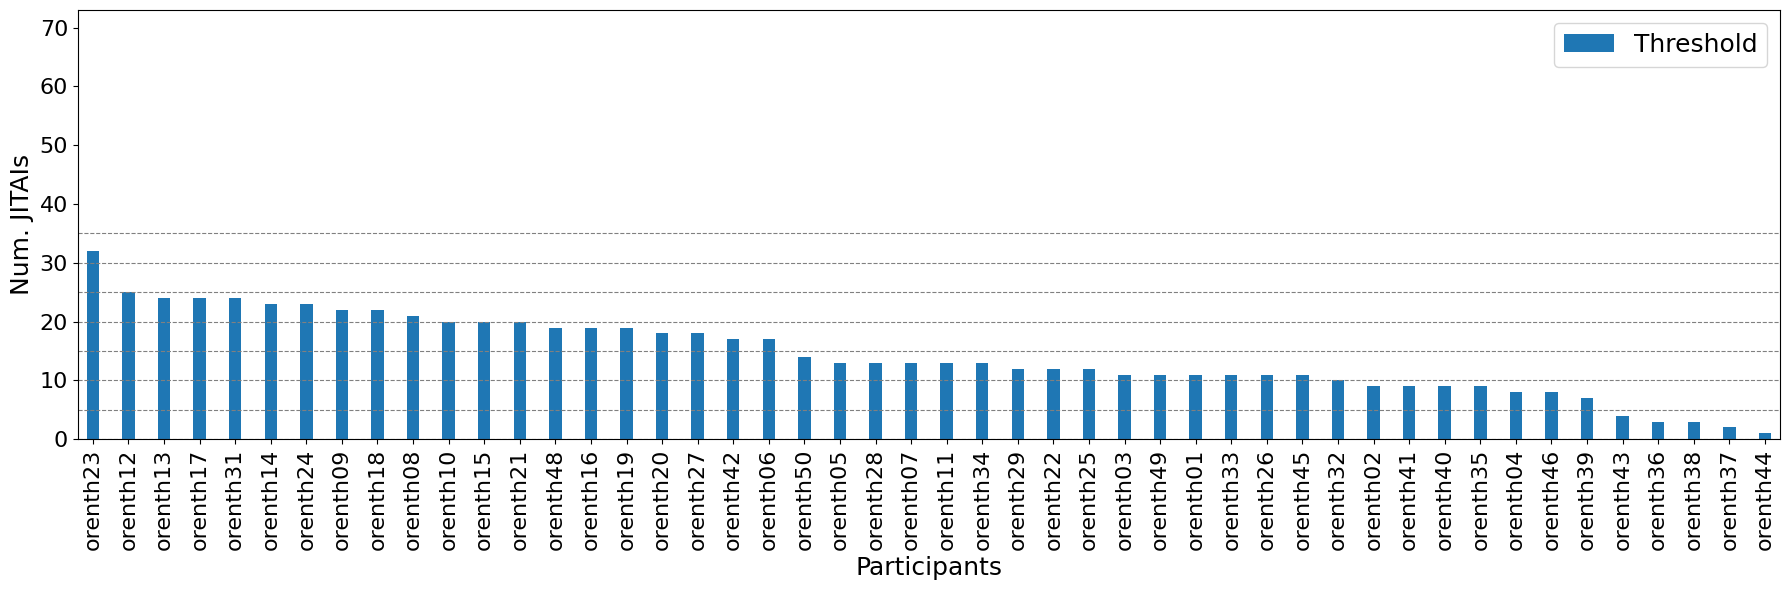

In [14]:
# Plot a bar plot for each row comparing Threshold and Personalized number of JITAIs
ax = df_delta_phase1.plot(kind='bar', rot=0, figsize=(18, 6),  width=0.35)

# Show horizontal lines
for tick in ax.get_yticks():
    plt.axhline(y=tick, color='gray', linestyle='--', linewidth=0.8)

# aesthetic edits
plt.xlabel('Participants', fontsize=18)
plt.ylabel('Num. JITAIs', fontsize=18)

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,73])
plt.legend(fontsize=18)

plt.tight_layout()

# Save the figure
plt.savefig('./img/figure_12_orenth_before_after_jitai.png')

# Show the plot
plt.show()

## Phase 2 (Usk)

In [15]:
df_delta = pd.DataFrame(columns=["id_participant", "Threshold", "Personalized"])

for participant in df_phase2_temperature_threshold["id_participant"].unique():
    df_participant_threshold = df_phase2_temperature_threshold[df_phase2_temperature_threshold["id_participant"] == participant]
    df_participant_personalised = df_phase2_temperature_personalised[df_phase2_temperature_personalised["id_participant"] == participant]
    df_delta.loc[len(df_delta)] = [participant, len(df_participant_threshold), len(df_participant_personalised)]

# sort the dataframe
#df_delta['id_participant'] = df_delta['id_participant'].str.replace("usk", "ID")

df_delta = df_delta.loc[(df_delta['Threshold'] + df_delta['Personalized']).sort_values(ascending=False).index]

df_delta.set_index('id_participant', inplace=True)

print(df_delta)

print(sum(df_delta["Personalized"])) # sanity check

                Threshold  Personalized
id_participant                         
usk33                  36            62
usk27                  18            72
usk26                  50            38
usk10                  47            33
usk46                  39            29
usk04                  13            45
usk15                  10            46
usk08                  13            42
usk50                  19            34
usk09                  21            31
usk29                   7            41
usk44                  25            22
usk02                  12            32
usk28                  42             0
usk40                  10            28
usk41                  36             0
usk51                  15            19
usk53                  20            12
usk07                  31             0
usk45                  30             0
usk42                  29             0
usk43                  27             0
usk55                  27             0


# Plots

## Old vs New JITAI messages for Phase 2 (Usk)

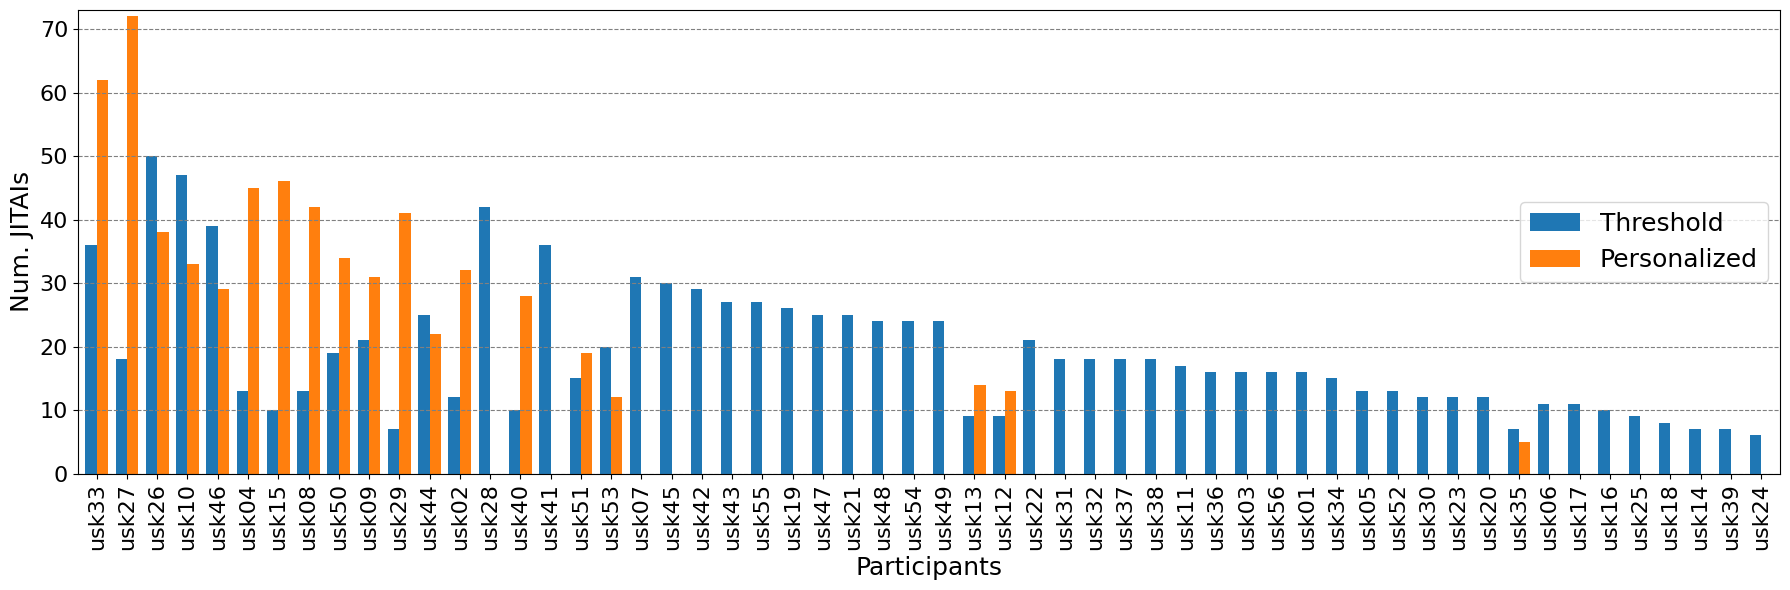

In [16]:
# Plot a bar plot for each row comparing Threshold and Personalized number of JITAIs
ax = df_delta.plot(kind='bar', rot=0, figsize=(18, 6),  width=0.75)

# Show horizontal lines
for tick in ax.get_yticks():
    plt.axhline(y=tick, color='gray', linestyle='--', linewidth=0.8)

# aesthetic edits
plt.xlabel('Participants', fontsize=18)
plt.ylabel('Num. JITAIs', fontsize=18)

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,73])
plt.legend(fontsize=18)

plt.tight_layout()

# Save the figure
plt.savefig('./img/figure_12_usk_before_after_jitai.png')

# Show the plot
plt.show()